## K-means

In [1]:
import numpy as np
data = np.random.random(90).reshape(30,3) #90 elementos en matriz 30x3

#selección de dos observaciones al azar
c1 = np.random.choice(range(len(data)))
c2 = np.random.choice(range(len(data)))

#calculo del primer centroide
clust_centers = np.vstack([data[c1], data[c2]]) ##determinación de centros vstack: uno debajo del otro
clust_centers

array([[0.95674173, 0.72907258, 0.71487128],
       [0.7203358 , 0.64705661, 0.01044064]])

In [3]:
from scipy.cluster.vq import vq
#vq:devuelve dos array etiqueta de cluster y distancia al baricentro de su cluster
clusters = vq(data, clust_centers) 
labels = clusters[0]

In [5]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.offline as ply

In [8]:
x = []
y = []
z = []
x2 = []
y2 = []
z2 = []

for i in range(0, len(labels)):
    if(labels[i] == 0):
        x.append(data[i,0])
        y.append(data[i,1])
        z.append(data[i,2])
        
    else:
        x2.append(data[i,0])
        y2.append(data[i,1])
        z2.append(data[i,2])

cluster1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.9
    ),
    name="Cluster 0"
)


cluster2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    ),
    name="Cluster 1"
)
data2 = [cluster1, cluster2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=30
    )
)

fig = go.Figure(data=data2, layout=layout)
ply.plot(fig, filename='Clusters.html')

'Clusters.html'

In [6]:
from scipy.cluster.vq import kmeans

kmeans(data, clust_centers) #dados los centros devuelve las coordenadas de los baricentros y la suma de las distancias
kmeans(data, 2) #dado el número de clusters '' ''

(array([[0.64871571, 0.6363366 , 0.45537751],
        [0.15434207, 0.484039  , 0.75570722]]),
 0.3726081058586256)

### Generación de distribuciones en forma de anillo

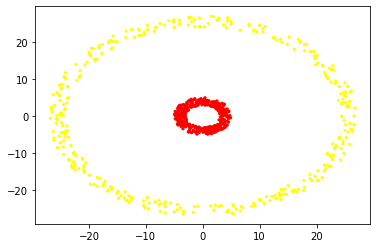

In [2]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt


def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

data1 = ring(3, 5)
data2 = ring(24, 27)

data = np.concatenate([data1, data2], axis = 0)
labels = np.concatenate([[0 for i in range(0,len(data1))], [1 for i in range(0,len(data2))]])
plt.scatter(data[:,0], data[:,1], c = labels, s = 5, cmap = "autumn")

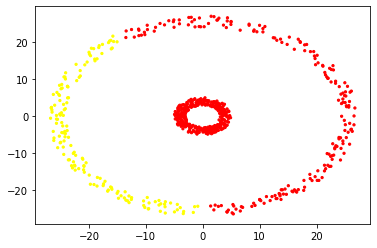

In [3]:
from sklearn.cluster import KMeans
km = KMeans(2).fit(data)
clust = km.predict(data)

plt.scatter(data[:,0], data[:, 1], c = clust, s = 5, cmap="autumn")

### k-medoids

  Created wheel for pyclust: filename=pyclust-0.2.0-py3-none-any.whl size=12804 sha256=49bda7aed4e2de85a4c3e0e764237526471439fe1bc22aac454c4d7e46fd0dc1
  Stored in directory: c:\users\crist\appdata\local\pip\cache\wheels\3d\cf\1e\eb1f2ec75d476fd669a37ad513ef754d024997957e569e61b1
Successfully built pyclust
  Created wheel for treelib: filename=treelib-1.6.1-py3-none-any.whl size=18371 sha256=ff2930ad5498097e53cd8087e3f3dbc8aa658c3f2d4e397be2e7922580e44543
  Stored in directory: c:\users\crist\appdata\local\pip\cache\wheels\71\df\8b\6b005e3bb9b275c24dfc392cda334f43f132e85a6f17cfad3a
Successfully built treelib


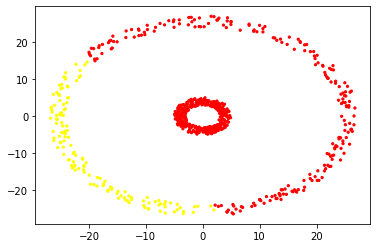

In [4]:
!pip install pyclust
!pip install treelib
from pyclust import KMedoids

kmed = KMedoids(2).fit_predict(data)
plt.scatter(data[:,0], data[:,1], c=kmed, s=5, cmap="autumn")

###  Clustering espectral

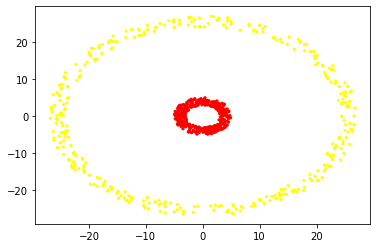

In [5]:
from sklearn.cluster import SpectralClustering

clust = SpectralClustering(2).fit_predict(data)

plt.scatter(data[:,0], data[:,1], c = clust, s = 5, cmap = "autumn")

* Podemos estimar la k:
    * No: Propagación de la afinidad
    * Si: Podemos usar la distancia Euclídea:
        * Si: K-Means
        * No: Buscar valores centrales:
            * Si: K-Medoides 
            * No: Los datos son linealmente separables:
                * Si: Clustering aglomerativo
                * No: Clustering Espectral

## Clustering completo

In [1]:
import pandas as pd

df = pd.read_csv("../../../python-ml-course/datasets/wine/winequality-red.csv", sep = ";")
df.head()
df.shape

(1599, 12)

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

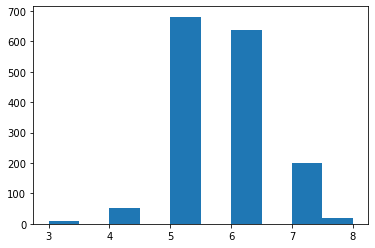

In [2]:
import matplotlib.pyplot as plt
plt.hist(df["quality"])

In [3]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Normalización de los datos

In [4]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


### Clustering jerárquico con scikit-learn

Text(0, 0.5, 'Número de vinos del cluster')

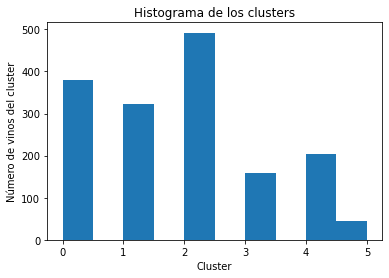

In [5]:
from sklearn.cluster import AgglomerativeClustering

clus= AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm) #el df se pasa por .fit()

md_h = pd.Series(clus.labels_) #obtención de etiquetas

plt.hist(md_h) #histograma de frecuencias de las etiquetas
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [6]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

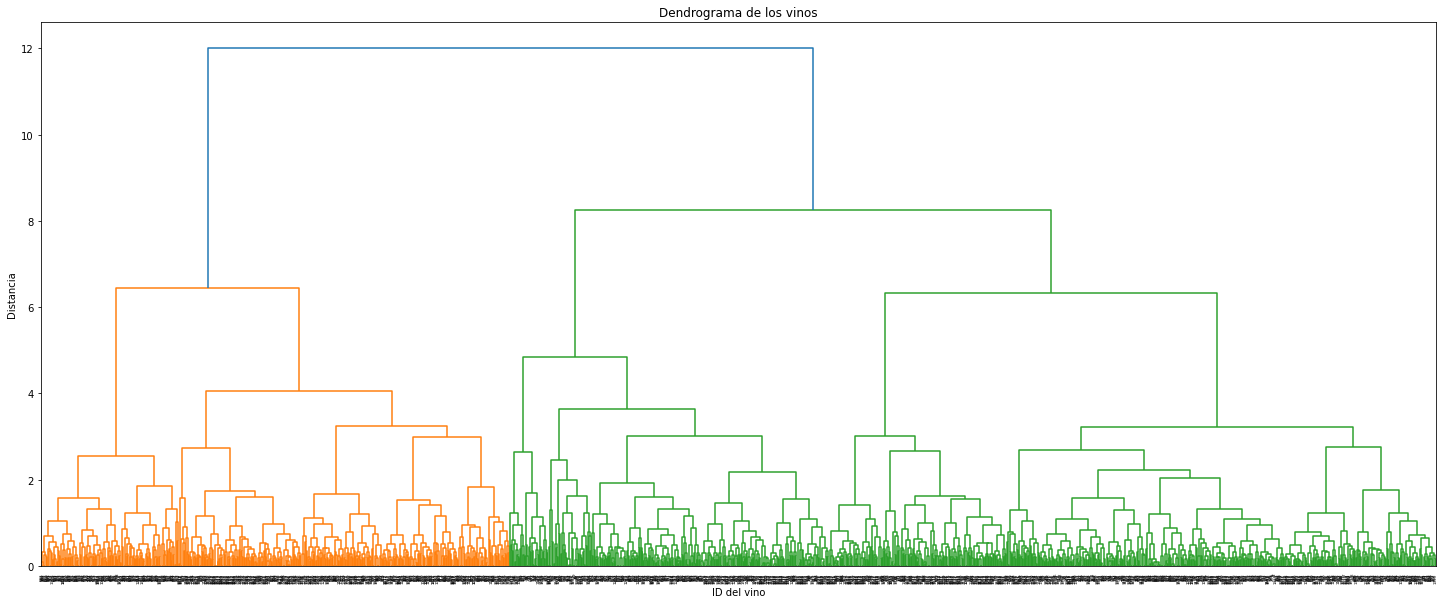

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df_norm, "ward")

plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=4.)
plt.show()

### k-means

In [8]:
from sklearn.cluster import KMeans
from sklearn import datasets


model = KMeans(n_clusters=6)
model.fit(df_norm)

model.labels_

md_k = pd.Series(model.labels_)

#Añadimos al DF columna de etiqueta según la clasificación jerárquica o la k-means
df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k

df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,2
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,2
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,2
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,4
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,2


(array([ 29.,   0., 276.,   0., 505.,   0., 319.,   0., 247., 223.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

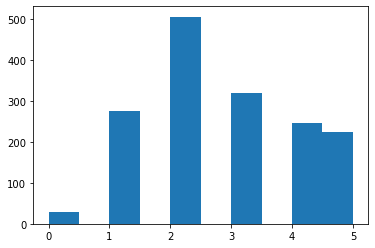

In [9]:
plt.hist(md_k)

In [10]:
#coordenadas en espacio k-dimensiones del baricentro de cada cluster
model.cluster_centers_

array([[0.32987489, 0.28412848, 0.48758621, 0.07416155, 0.54953658,
        0.21369597, 0.2114049 , 0.51240569, 0.23486288, 0.59281437,
        0.16127321, 0.46896552],
       [0.36344107, 0.16000347, 0.41978261, 0.10348422, 0.10664513,
        0.16033884, 0.08339735, 0.41617719, 0.4206322 , 0.23585438,
        0.47892977, 0.69057971],
       [0.26266538, 0.35961617, 0.11758416, 0.09143497, 0.12257723,
        0.1457119 , 0.10711962, 0.49058897, 0.48781477, 0.1550246 ,
        0.22113734, 0.44039604],
       [0.31725248, 0.27938335, 0.30423197, 0.15177996, 0.12704037,
        0.37750011, 0.29632132, 0.54009639, 0.43578604, 0.1786083 ,
        0.21261956, 0.4539185 ],
       [0.58249436, 0.20765626, 0.51105263, 0.13451833, 0.13089968,
        0.13816502, 0.0918871 , 0.65661358, 0.3306449 , 0.22332663,
        0.29029378, 0.5465587 ],
       [0.17373705, 0.32388353, 0.09251121, 0.0939554 , 0.09562275,
        0.25298427, 0.12638451, 0.32242877, 0.57904029, 0.18603152,
        0.49143383,

In [11]:
#suma de cuadrados internos entre los cuadrados totales: coef. incercia
model.inertia_

186.53981524799366

## Interpretación final

In [12]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.329875,0.284128,0.487586,0.074162,0.549537,0.213696,0.211405,0.512406,0.234863,0.592814,0.161273,0.468966,4.896552
1,0.363441,0.160003,0.419783,0.103484,0.106645,0.160339,0.083397,0.416177,0.420632,0.235854,0.478930,0.690580,0.134058
2,0.262665,0.359616,0.117584,0.091435,0.122577,0.145712,0.107120,0.490589,0.487815,0.155025,0.221137,0.440396,2.021782
3,0.317252,0.279383,0.304232,0.151780,0.127040,0.377500,0.296321,0.540096,0.435786,0.178608,0.212620,0.453918,1.053292
4,0.582494,0.207656,0.511053,0.134518,0.130900,0.138165,0.091887,0.656614,0.330645,0.223327,0.290294,0.546559,2.064777
5,0.173737,0.323884,0.092511,0.093955,0.095623,0.252984,0.126385,0.322429,0.579040,0.186032,0.491434,0.612556,3.452915
